In [ ]:
#Nahomy Fernández EC02 Tutorias

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

--- Vista Previa del Dataset (Breast Cancer) ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst textu

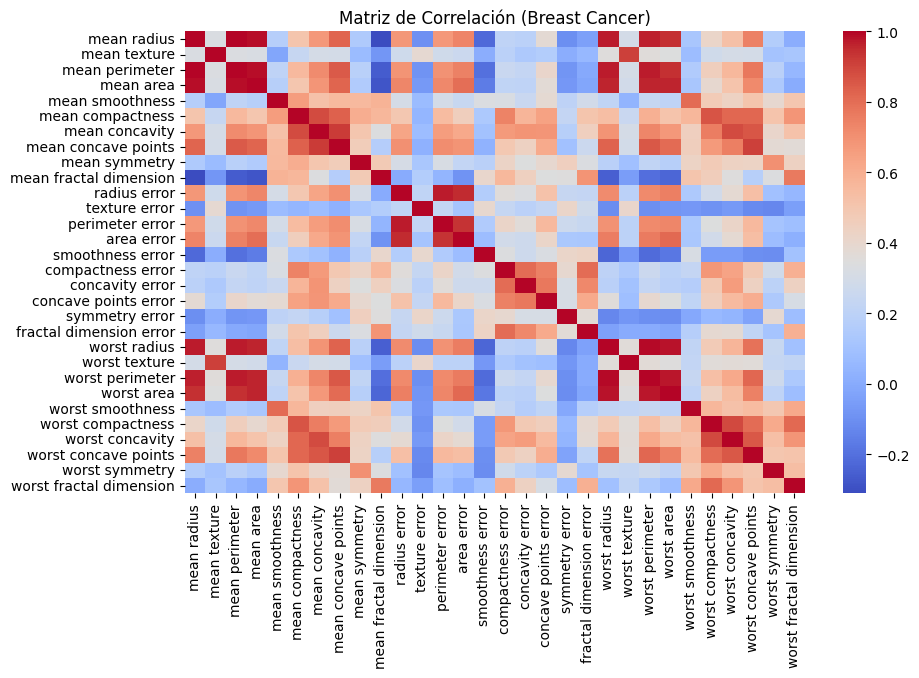

--- Comparación de Modelos (Precisión) ---
                     Precisión
Modelo                        
Regresion Logistica   0.982456
KNN                   0.959064
Arbol de Decision     0.941520
Naive Bayes           0.935673


In [35]:


seed = 42
np.random.seed(seed)

data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer["Resultado"] = data.target

print("--- Vista Previa del Dataset (Breast Cancer) ---")
print(df_cancer.head())
print("\n")

x = df_cancer.drop("Resultado", axis=1)
y = df_cancer["Resultado"]

plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación (Breast Cancer)")
plt.show()

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=seed)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

def evaluarmodelo(modelo,x_train,y_train,x_test,y_test):
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

resultados = {}

nb_model = GaussianNB()
resultados["Naive Bayes"] = evaluarmodelo(nb_model,x_train,y_train,x_test,y_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
resultados["KNN"] = evaluarmodelo(knn_model,x_train,y_train,x_test,y_test)

log_model = LogisticRegression(solver='liblinear',random_state=seed)
resultados["Regresion Logistica"] = evaluarmodelo(log_model,x_train,y_train,x_test,y_test)

tree_model = DecisionTreeClassifier(random_state=seed)
resultados["Arbol de Decision"] = evaluarmodelo(tree_model,x_train,y_train,x_test,y_test)

df_resultados = pd.DataFrame(list(resultados.items()),columns=["Modelo","Precisión"])
df_resultados = df_resultados.sort_values(by="Precisión",ascending=False)

print("--- Comparación de Modelos (Precisión) ---")
print(df_resultados.set_index("Modelo"))

In [27]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

print(f"Dataset cargado: {x.shape[0]} muestras y {x.shape[1]} características")
print(f"Clases: {cancer.target_names}")
print(f"Características: {cancer.feature_names}")
print ("")
print (f"Distribución de clases: {np.bincount(y)}")

Dataset cargado: 569 muestras y 30 características
Clases: ['malignant' 'benign']
Características: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Distribución de clases: [212 357]


In [28]:
print(f"Valores nulos x : {np.sum(np.isnan(x))}")
print(f"Valores nulos y : {np.sum(np.isnan(y))}")


Valores nulos x : 0
Valores nulos y : 0


In [29]:
# Dividir
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)
print (f"Conjunto de entrenamiento: {x_train.shape [0]} muestras")
print (f"Conjunto de prueba: {x_test.shape [0]} muestras")

print(f"Entrenamiento: {np.bincount(y_train)}")
print(f"Prueba: {np.bincount(y_test)}")

Conjunto de entrenamiento: 398 muestras
Conjunto de prueba: 171 muestras
Entrenamiento: [148 250]
Prueba: [ 64 107]


In [30]:
#Escalamiento
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
#Crear modelo
modelo_cancer = LogisticRegression(random_state=42)
#Entrenar modelo
modelo_cancer.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [32]:
#Prediccion
y_pred = modelo_cancer.predict(x_test_scaled)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.3f}")
print(classification_report(y_test,y_pred,target_names = cancer.target_names))
cm = confusion_matrix(y_test,y_pred)
print(cm)

Precisión del modelo: 0.988
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[ 63   1]
 [  1 106]]


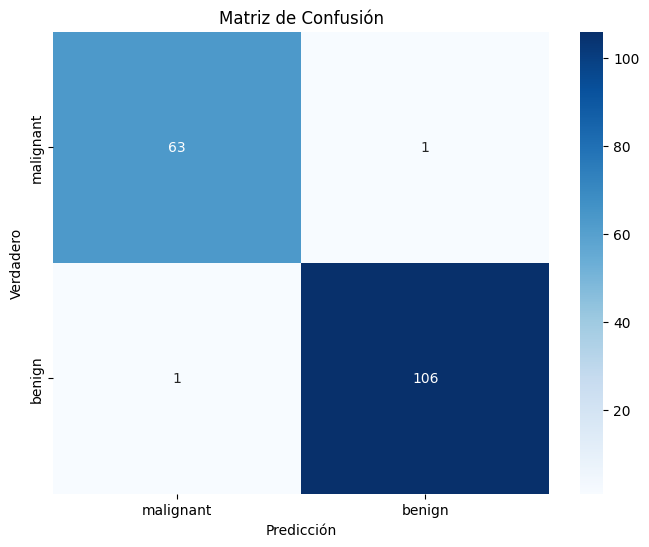

In [33]:
#Visualizacion

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()